# OpenCV 
- OpenCV is a Python library that allows you to perform image processing and computer vision tasks. It provides a wide range of features, including object detection, face recognition, and tracking.
- OpenCV is an open-source software library for computer vision and machine learning. The OpenCV full form is Open Source Computer Vision Library. 
- OpenCV-Python is a library of Python bindings designed to solve computer vision problems.

## Computer vision
- Computer vision is a field of study in computer science and artificial intelligence that focuses on enabling computers to interpret and analyze visual data from the world around them. The goal of computer vision is to give computers the ability to understand images and videos in the same way that humans do.

- Computer vision algorithms use mathematical and statistical models to extract meaningful information from images and videos. This information can include things like object recognition, facial recognition, motion detection, and scene reconstruction. Some applications of computer vision include self-driving cars, medical imaging, security and surveillance, and augmented reality.

## How to Install OpenCV
Install using Anaconda
- conda install -c conda-forge opencv  

For Windows

- pip install opencv-python  

In [1]:
#importing  modules  
import cv2
import warnings 
import numpy as np
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")
%matplotlib inline

### load  with the function cv.imread and display it with the function imshow in a window

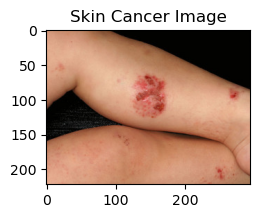

In [2]:
plt.figure(figsize=(4,2))
# read image  
imagedata = plt.imread("data/skincancer.jpg")
plt.title('Skin Cancer Image')
plt.imshow(imagedata)
plt.show()

##  Image Properties
- To know the size of the image use the index position to get the height, width, and number of channels.

In [3]:
print("Image Shape : {}".format(imagedata.shape))
print("Image Size is: Height : {}, Widht : {} and Channle : {} = {}"
      .format(imagedata.shape[0],imagedata.shape[1],imagedata.shape[2],imagedata.size))

Image Shape : (222, 294, 3)
Image Size is: Height : 222, Widht : 294 and Channle : 3 = 195804


### Create Function is useful for showing images and using function when we need to show images. Actually, it's necessary to create a function when we need the same type of code in different place.

In [4]:
def skin_image_show(image_title, image):
    #Change in Image color use cvtColor
    # Using cv2.COLOR_BGR2RGB color space for convert BGR image to RGB  
    imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(imageVariable)
    plt.title(image_title)  #show the image title 
    plt.grid(False)  # used to add grid lines when Value is True it show grid  line and when false it show orginal image
    plt.show()
    

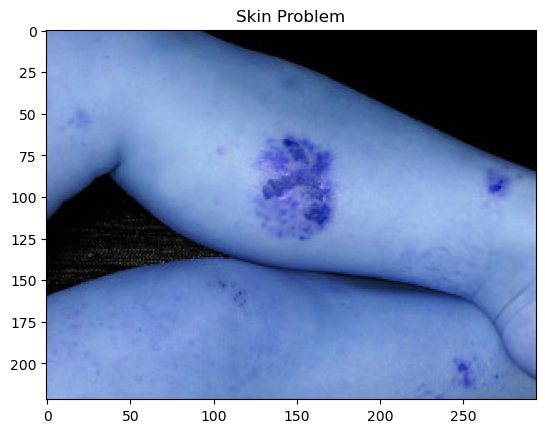

In [5]:
skin_image_show("Skin Problem", imagedata)

##  Create ImageMask 

- An image mask is essentially a binary image with the same dimensions as the image to which it is applied. Each pixel in the mask is either 0 or 1, indicating whether the corresponding pixel in the original image should be modified or not. When the mask is applied to the original image, only the pixels with corresponding mask values of 1 are modified, while the pixels with corresponding mask values of 0 are left unchanged. 

## Steps 
### Create an image mask in OpenCV:

- Create a mask: Create a new numpy array of the same dimensions as the image, initialized to all zeros. This will be your mask. Then, set the pixels in the mask to 1 where you want to modify the image, and leave them as 0 where you want to leave the original image unchanged. You can use various OpenCV functions to create different types of masks, such as cv2.rectangle(), cv2.circle(), cv2.ellipse(), etc., or you can create masks manually using numpy operations.

- Apply the mask: Use the cv2.bitwise_and() function to apply the mask to the original image. This function performs a bitwise AND operation between each pixel in the image and the corresponding pixel in the mask, resulting in a new image with only the pixels that pass the mask.


In [6]:
imagedata.shape[:3]

(222, 294, 3)

In [7]:
#Here to create mask use only Height and width value not working Channle
Image_mask = np.zeros(imagedata.shape[:2], dtype="uint8")

In [8]:
Image_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
#Rectangle Shape use 
cv2.rectangle(Image_mask,(0,45),(45,90),255,-1) 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

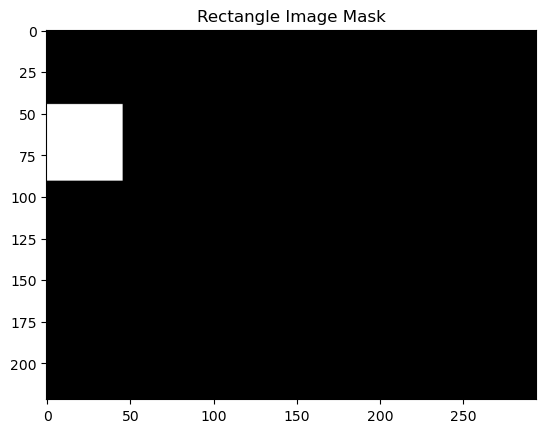

In [10]:
skin_image_show("Rectangle Image Mask",Image_mask)

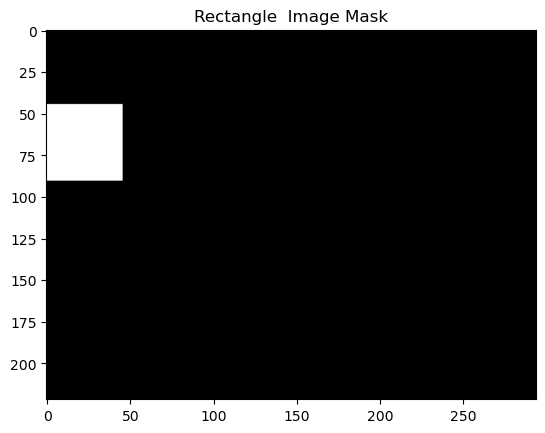

In [11]:
argmumentImage = {"Image":"../input/skindataset/skincancer.jpg"}
#cv2.bitwise_and(), resulting in a new image with only the pixels inside the rectangle. 
bit_mask = cv2.bitwise_and(imagedata, imagedata, mask = Image_mask)
skin_image_show("Rectangle  Image Mask",Image_mask)

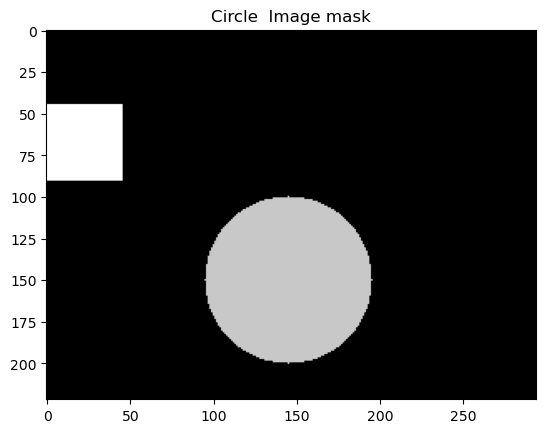

In [12]:
cv2.circle(Image_mask, (145, 150), 50, 200, -1)
bit_mask = cv2.bitwise_and(imagedata, imagedata, mask = Image_mask)
skin_image_show("Circle  Image mask", Image_mask)

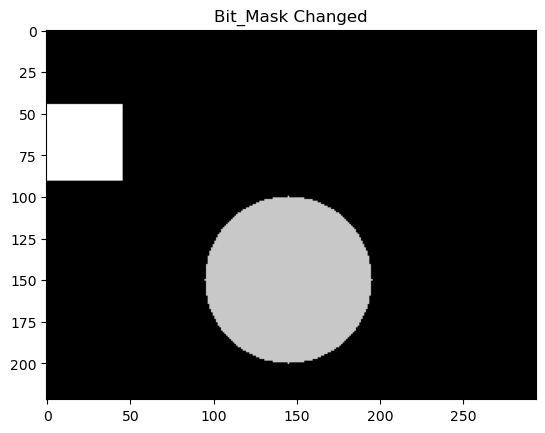

In [13]:
argmumentImage = {"Image":"data/skincancer.jpg",
                 "scharr":0}#scharr needed for derivative gray image
imagedata = plt.imread(argmumentImage["Image"])
bit_mask = cv2.bitwise_and(imagedata, imagedata, mask = Image_mask)
skin_image_show("Bit_Mask Changed",Image_mask)

### Image reshape
it is necessary to transform the loaded image. In the image processing, we need to resize the image to perform the particular operation


In [14]:
#Normalizing the pixel values by dividing by 255 scales
imagedata/255

array([[[0.8       , 0.56078431, 0.44705882],
        [0.8       , 0.56862745, 0.45098039],
        [0.80392157, 0.57254902, 0.45490196],
        ...,
        [0.00784314, 0.00784314, 0.        ],
        [0.00784314, 0.00784314, 0.        ],
        [0.00784314, 0.00784314, 0.        ]],

       [[0.80784314, 0.56862745, 0.45490196],
        [0.80784314, 0.57647059, 0.45882353],
        [0.80784314, 0.57647059, 0.45882353],
        ...,
        [0.00784314, 0.00784314, 0.        ],
        [0.00784314, 0.00784314, 0.        ],
        [0.00784314, 0.00784314, 0.        ]],

       [[0.81960784, 0.58039216, 0.46666667],
        [0.81960784, 0.58823529, 0.47058824],
        [0.81568627, 0.58431373, 0.46666667],
        ...,
        [0.00784314, 0.00784314, 0.        ],
        [0.00784314, 0.00784314, 0.        ],
        [0.00784314, 0.00784314, 0.        ]],

       ...,

       [[0.90980392, 0.67058824, 0.56078431],
        [0.89411765, 0.65490196, 0.54509804],
        [0.89803922, 0

In [15]:
customValueH = 120.0/imagedata.shape[0]#Here 120 is just a magic value. for next use gradient descent to calculate magic value

In [16]:
customValueW = 120.0/imagedata.shape[1]

In [17]:
print("Custom Image Width",customValueW)
print("Custom Image Height",customValueH)

Custom Image Width 0.40816326530612246
Custom Image Height 0.5405405405405406


In [18]:
imagedata.shape[0]

222

In [19]:
imageDimention = (120, int(imagedata.shape[0]*customValueW)) 
#The dimensions of an image refer to its width and height in pixels

In [20]:
imageDimention

(120, 90)

#### The cv2.resize() function takes three arguments: the original image, the desired output size, and an interpolation method.
 ##### interpolation methods :

- cv2.INTER_NEAREST: Nearest-neighbor interpolation
- cv2.INTER_LINEAR: Bilinear interpolation (default)
- cv2.INTER_CUBIC: Bicubic interpolation (slow)
- cv2.INTER_AREA: Resampling using pixel area relation
- cv2.INTER_LANCZOS4: Lanczos interpolation (slowest)

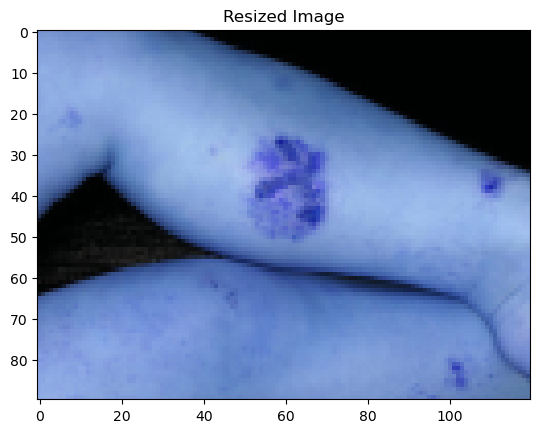

In [21]:
newImage = cv2.resize(imagedata, imageDimention, interpolation = cv2.INTER_AREA)
skin_image_show("Resized Image", newImage)

In [22]:
newImage.shape

(90, 120, 3)

# Rotation Image
 

In [23]:
# unpack imageData
(ImageH, ImageW) = imagedata.shape[:2]

In [24]:
print("Image Height :",ImageH)
print("Image Width :",ImageW)

Image Height : 222
Image Width : 294


In [25]:
centerX, centerY = (ImageH//2, ImageW//2)

- The cv2.getRotationMatrix2D() function takes three main arguments: the rotation point (center of rotation), the rotation angle, and the scale factor. The rotation point is a tuple of two values (x, y) that specifies the center of rotation, and the rotation angle is the angle (in degrees) by which you want to rotate the image. The scale factor is an optional argument that specifies the scaling factor to be applied.
- The cv2.warpAffine() function takes three main arguments: the input image, the transformation matrix, and the output image size. The transformation matrix is a 2x3 matrix that defines the affine transformation to be applied, and can be generated using functions such as cv2.getRotationMatrix2D() and cv2.getAffineTransform(). The output image size is the size of the destination image.

In [26]:
imageRotate = cv2.getRotationMatrix2D((centerX,centerY), 45, 1)

In [27]:
rotateNow = cv2.warpAffine(imagedata, imageRotate, (ImageW, ImageH))

In [28]:
rotateNow

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

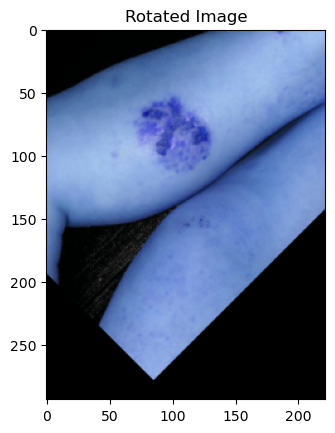

In [29]:
imageRotate = cv2.getRotationMatrix2D((centerX, centerY), 45, 1.0)
rotateNow = cv2.warpAffine(imagedata, imageRotate, (ImageH, ImageW))
skin_image_show("Rotated Image", rotateNow)

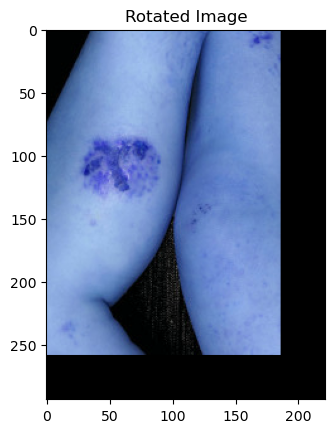

In [30]:
imageRotate = cv2.getRotationMatrix2D((centerX, centerY), 90, 1.0)
rotateNow = cv2.warpAffine(imagedata, imageRotate, (ImageH, ImageW))
skin_image_show("Rotated Image", rotateNow)

# Sobel operation
- Convert the image to grayscale
- Define the Sobel kernels
- Edge Detection



In [31]:
#step 1:
grayImage =cv2.cvtColor(imagedata, cv2.COLOR_RGB2GRAY)

In [32]:
grayImage.shape

(222, 294)

In [33]:
kernelGen = -1 if argmumentImage["scharr"] > 0 else 3 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


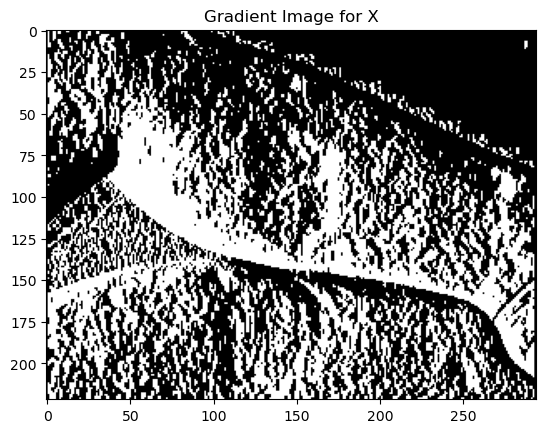

In [34]:
gradienImageDataX = cv2.Sobel(grayImage, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = kernelGen)
gradienImageDataY = cv2.Sobel(grayImage, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = kernelGen)
skin_image_show("Gradient Image for X", gradienImageDataX)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


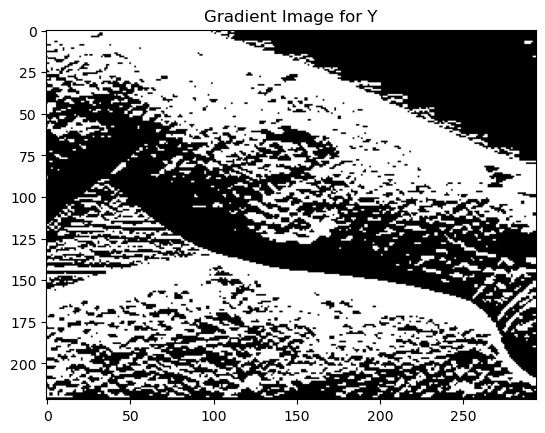

In [35]:
skin_image_show("Gradient Image for Y", gradienImageDataY)

In [36]:
#in X cordinate first and last column values 0.0
gradienImageDataX

array([[  0.,   6.,  -2., ...,   0.,   0.,   0.],
       [  0.,   4.,  -4., ...,   0.,   0.,   0.],
       [  0.,   2.,  -7., ...,   0.,   0.,   0.],
       ...,
       [  0.,  -7.,  15., ...,  -4.,   4.,   0.],
       [  0., -12.,  14., ...,   0.,   1.,   0.],
       [  0., -14.,  14., ...,   2.,   0.,   0.]], dtype=float32)

In [37]:
#in Y cordinate first and last Rows values 0.0
gradienImageDataY

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [ 20.,  18.,  14., ...,   0.,   0.,   0.],
       [ 20.,  20.,  19., ...,   0.,   0.,   0.],
       ...,
       [  6.,   3.,  -1., ...,  -6.,  -6.,  -8.],
       [ 14.,  12.,  10., ..., -10.,  -9., -10.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)